# Carga de librerías y funciones necesarias

In [1]:
import tensorflow as tf
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re
import string
import spacy

from string import digits

sp = spacy.load('en_core_web_sm')

from string import digits
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
def cut_text_len(list):
    temp = []
    temp_coma = []
    temp_list = []

    for sentence in list: temp.extend(sentence.split('.'))
    for sentence in temp: temp_coma.extend(sentence.split(','))
    temp_coma = [sentence for sentence in temp_coma if len(sentence.split()) > 2]

    for sentence in temp_coma:
        text = sentence.split()
        new_sentence = ''
        len_sentence = 0
        mess = len(text)
        while mess > 0:
            new_sentence += text[0] + ' '
            text.pop(0)
            len_sentence += 1
            mess = len(text)
            if len_sentence == 15:            
                temp_list.append(new_sentence)
                new_sentence = ''
                len_sentence = 0
                mess = len(text)
            elif mess == 0:
                mess = len(new_sentence.split())
                if mess <= 2:
                    break
                temp_list.append(new_sentence)
                break
    return(temp_list)

def clean_text(list):   
    text_clean = []
    for text in list:
        text = text.lower()
        new_text = ''
        for word in text.split():
            for key in contractions:
                if word == key:
                    word = contractions[key]
            new_text += word + ' '
        text = re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', new_text) 
        text = re.sub(patron_web, '', text)
        table = str.maketrans(' ', ' ', string.punctuation)
        stripped = [word.translate(table) for word in text]
        text = ''.join(stripped)
        table = str.maketrans('', '', digits)
        newtext = text.translate(table)
        newtext = re.sub("\'", '', newtext)
        text_clean.append(newtext)

    return(text_clean)

# Fuente: https://kgptalkie.com/3664-2/
# Lista de contracciones en inglés extraída de "NLP: End to End Text Processing for Beginners" (., Roshan)

contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"aint": "am not",
"arent": "are not",
"cant": "can not",
"cantve": "cannot have",
"cause": "because",
"couldve": "could have",
"couldnt": "could not",
"couldntve": "could not have",
"didnt": "did not",
"doesnt": "does not",
"dont": "do not",
"hadnt": "had not",
"hadntve": "had not have",
"hasnt": "has not",
"havent": "have not",
"hed": "he would",
"hedve": "he would have",
"hell": "he will",
"hellve": "he will have",
"hes": "he is",
"howd": "how did",
"howdy": "how do you",
"howll": "how will",
"hows": "how does",
"id": "i would",
"idve": "i would have",
"ill": "i will",
"illve": "i will have",
"im": "i am",
"ive": "i have",
"isnt": "is not",
"itd": "it would",
"itdve": "it would have",
"itll": "it will",
"itllve": "it will have",
"its": "it is",
"lets": "let us",
"maam": "madam",
"maynt": "may not",
"mightve": "might have",
"mightnt": "might not",
"mightntve": "might not have",
"mustve": "must have",
"mustnt": "must not",
"mustntve": "must not have",
"neednt": "need not",
"needntve": "need not have",
"oclock": "of the clock",
"oughtnt": "ought not",
"oughtntve": "ought not have",
"shant": "shall not",
"shant": "shall not",
"shantve": "shall not have",
"shed": "she would",
"shedve": "she would have",
"shell": "she will",
"shellve": "she will have",
"shes": "she is",
"shouldve": "should have",
"shouldnt": "should not",
"shouldntve": "should not have",
"sove": "so have",
"sos": "so is",
"thatd": "that would",
"thatdve": "that would have",
"thats": "that is",
"thered": "there would",
"theredve": "there would have",
"theres": "there is",
"theyd": "they would",
"theydve": "they would have",
"theyll": "they will",
"theyllve": "they will have",
"theyre": "they are",
"theyve": "they have",
"tove": "to have",
"wasnt": "was not", 
"u": " you  ",
"ur": "your", 
"n": "and", 
"friends": "",
"friend":"",
"people":"",
"girl":"",
"girlfriend": "",
"grl":"",
"nt": "not",
"gf": "", 
"cuttersuicidal": "suicidal", 
"idk": "i do not know", 
"theripist": "therapist",
"s": "is",
"mt": "",
"cuttersuicidal": "cutter suicidal"
}

patron_web = r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'

def duplicated(list): 
    temp = []
    for sentence in list:
        new_sentence = sentence.split() 
        new_sentece_join = ' '.join(new_sentence)
        temp.append(new_sentece_join)
    return(temp)

def text_to_spacy(list): 
    temp = []
    for sentence in list:
        new_sentence = ''
        for word in sp(str(sentence)):
            new_sentence += word.lemma_ + ' '
        temp.append(new_sentence.lower())
    return(temp)

# Preparación de la data

In [3]:
df = pickle.load(open("./data/df.p", "rb" ))
df.head(10)

,text,label,label_bi,index
651,ex have onset and anxiety,flagged,1,-909
108,dumps expressing one schoolwork so think my li...,not_flagged,0,-903
441,that need it be a fairly common occurrence,not_flagged,0,-837
736,i call back and get a hospital number so i kno...,flagged,1,-833
145,gave least went campingsurfing week work throu...,not_flagged,0,-783
321,others even truth hurts best way start even would,not_flagged,0,-758
451,thing,not_flagged,0,-736
250,letting know fell open dialog,not_flagged,0,-718
641,eventually anything time end trouble start date,flagged,1,-708
631,either death hold talk they look addiction def...,flagged,1,-705


In [4]:
sentences = df['text'].to_list()
labels = df['label_bi'].to_list()
labels[:5]

[1, 0, 0, 1, 0]

In [5]:
vocab_size = 620
embedding_dim = 24
max_length = 16
trunc_type='pre'
padding_type='pre'
oov_tok = "<OOV>"
training_size = int(len(sentences)*0.80)

In [6]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [8]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)


In [10]:
print(testing_sentences[1])
print(testing_padded[1])


dealing confines head little bit openness dealing troubles
[  0   0   0   0   0   0   0   0 311 199 146  72 132 420 311 147]


In [11]:
model = tf.keras.Sequential([
     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
     tf.keras.layers.Dropout(0.3),
     tf.keras.layers.LSTM(100),
     tf.keras.layers.Dropout(0.3),
     tf.keras.layers.Dense(1, activation='sigmoid')
 ])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 24)            14880     
_________________________________________________________________
dropout (Dropout)            (None, 16, 24)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               50000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 64,981
Trainable params: 64,981
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs = num_epochs, validation_data=(testing_padded, testing_labels), verbose=1) 

Epoch 1/10
26/26 [==============================] - 0s 13ms/step - loss: 0.1155 - accuracy: 0.9516 - val_loss: 0.1929 - val_accuracy: 0.9356
Epoch 2/10
26/26 [==============================] - 0s 12ms/step - loss: 0.0863 - accuracy: 0.9752 - val_loss: 0.1969 - val_accuracy: 0.9257
Epoch 3/10
26/26 [==============================] - 0s 11ms/step - loss: 0.1030 - accuracy: 0.9727 - val_loss: 0.2714 - val_accuracy: 0.9010
Epoch 4/10
26/26 [==============================] - 0s 10ms/step - loss: 0.0720 - accuracy: 0.9764 - val_loss: 0.1833 - val_accuracy: 0.9307
Epoch 5/10
26/26 [==============================] - 0s 10ms/step - loss: 0.0615 - accuracy: 0.9764 - val_loss: 0.1351 - val_accuracy: 0.9554
Epoch 6/10
26/26 [==============================] - 0s 13ms/step - loss: 0.0509 - accuracy: 0.9777 - val_loss: 0.1290 - val_accuracy: 0.9505
Epoch 7/10
26/26 [==============================] - 0s 10ms/step - loss: 0.0470 - accuracy: 0.9777 - val_loss: 0.1266 - val_accuracy: 0.9604
Epoch 8/10
26

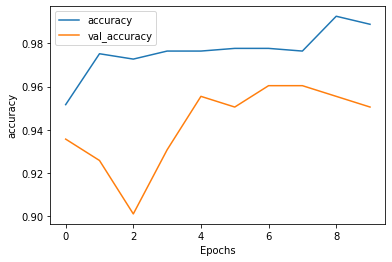

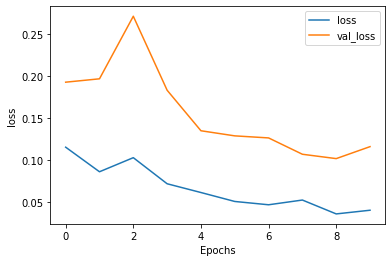

In [21]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Ejemplo #1

In [26]:
new_sentences = data = ["I've some anxiety and some days want to die", 
                        "I help her with her depression",
                        "I'm very sad and depressed today. want to finish it ", 
                        "Some of my friends are suicidal", 
                        "I am happy and joyful "]

In [27]:
new_sentences = cut_text_len(new_sentences)
new_sentences = clean_text(new_sentences)
new_sentences = text_to_spacy(new_sentences)
new_sentences = duplicated(new_sentences)

In [28]:
sequences = tokenizer.texts_to_sequences(new_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
total = model.predict(padded)

In [29]:
i = 0
for sentence in new_sentences: 
    print(sentence , ':',  str(float(total[i])))
    i += 1

i have some anxiety and some day want to die : 0.9480705261230469
i help she with her depression : 0.9773111343383789
i be very sad and depressed today : 0.9946457147598267
want to finish it : 0.48846158385276794
some of my be suicidal : 0.02422255277633667
i be happy and joyful : 0.07623383402824402


# Ejemplo #2

In [34]:
new_sentences = ["my name is andie. i am 16 years old. my life is too messed up for fixing. i have been through a lot. i think it's my time to go. there's no other way . i will not be stating my method because i don't want to be copied. i love you, stranger, please live a better life than me."]

In [32]:
new_sentences = cut_text_len(new_sentences)
new_sentences = clean_text(new_sentences)
new_sentences = text_to_spacy(new_sentences)
new_sentences = duplicated(new_sentences)

sequences = tokenizer.texts_to_sequences(new_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
total = model.predict(padded)

i = 0
for sentence in new_sentences: 
    print(sentence , ':',  str(float(total[i])))
    i += 1

my name be andie : 0.049216002225875854
i be year old : 0.6086801886558533
my life be too mess up for fix : 0.0033178627490997314
i have be through a lot : 0.06065836548805237
i think it be my time to go : 0.37844473123550415
there be no other way : 0.5441129207611084
i will not be state my method because i do not want to be copy : 0.0021991729736328125
i love you : 0.1085701584815979
please live a well life than i : 0.4895108640193939


# Ejemplo #3

In [36]:
new_sentences = ["Can someone explain to me how actively looking for help is one of the loneliest experiences someone can have? Not only am I miserable because I'm sick, but then I also have to listen to these people who are supposed to help me that I have to want to get better or it won't work. Now, I grew up evangelical (not practicing, agnostic, forever put off by religion) and I sure as hell know that expression. What if I don't believe in getting better. What if a big part of me just wants to decay. What if I dragged myself to your office with the last bit of strength in my body. If it were for me, I'd just lie down and die. Deep down, I don't want to get better, I want a do over. Everything is fucked. There's no ladder out of this hole, I only have a shovel and I'm going to dig myself a grave."]

In [38]:
new_sentences = cut_text_len(new_sentences)
new_sentences = clean_text(new_sentences)
new_sentences = text_to_spacy(new_sentences)
new_sentences = duplicated(new_sentences)
sequences = tokenizer.texts_to_sequences(new_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
total = model.predict(padded)
i = 0
for sentence in new_sentences: 
    print(sentence , ':',  str(float(total[i])))
    i += 1

can someone explain to i how actively look for help be one of the lonely : 1.1484719379950548e-06
experience someone can have not only be i miserable because i be sick : 2.0396435047587147e-06
but then i also have to listen to these who be suppose to help : 0.0015214979648590088
i that i have to want to get well or it wo not work : 0.9966904520988464
i grow up evangelical not practice : 0.001322925090789795
forever put off by religion and i sure as he will know that expression : 2.9821585485478863e-06
what if i do not believe in get well : 0.03317096829414368
what if a big part of i just want to decay : 0.003270477056503296
what if i drag myself to your office with the last bit of strength in : 0.050721168518066406
if it be for i : 0.28518348932266235
i would just lie down and die : 0.008244335651397705
i do not want to get well : 0.19594231247901917
i want a do over : 0.3678298592567444
everything be fuck : 0.8384888172149658
there be no ladder out of this hole : 0.17740970849990845
i